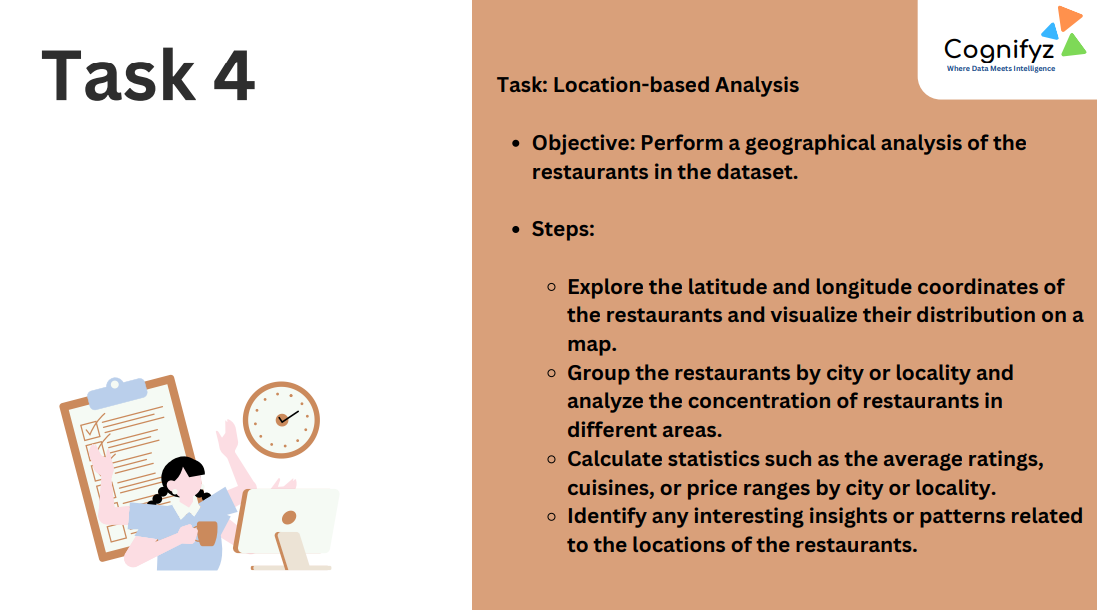

## Created by `Meet Parkin Jariwala`

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the dataset

In [2]:
df = pd.read_csv('Dataset.csv')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Removing missing values

In [3]:
df_clean = df.dropna()
df_clean.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Plotted all the restaurants present in the entire globe based on `Latitude` and `Longitude`.

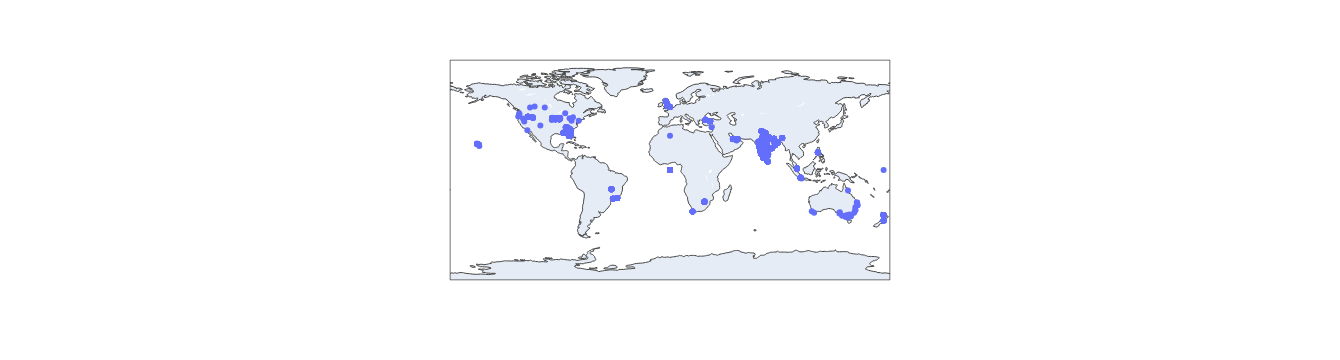

In [14]:
px.scatter_geo(data_frame=df_clean,lat='Latitude',lon='Longitude',hover_name='Restaurant Name',hover_data={'City':True})

- You can hover over the points  and also zoom in and zoom out and it will show the detalils i.e.Restaurant name, latitude, longitude, city

### Grouping the restaurants by city and analyzing the concentration of restaurants in different areas and
### calculating statistics such as the average ratings, cuisines, or price ranges by city.

In [5]:
city_stats = df_clean.groupby('City').agg(
    Restaurant_Count=('Restaurant ID', 'size'),
    Average_Rating=('Aggregate rating', 'mean'),
    Price_Range=('Price range', 'mean'),
    Most_Common_Cuisine=('Cuisines', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

city_stats = city_stats.sort_values(by='Restaurant_Count', ascending=False)

In [6]:
city_stats

,City,Restaurant_Count,Average_Rating,Price_Range,Most_Common_Cuisine
87,New Delhi,5473,2.438845,1.621597,North Indian
50,Gurgaon,1118,2.651431,1.855993,North Indian
88,Noida,1080,2.036204,1.601852,North Indian
43,Faridabad,251,1.866932,1.454183,North Indian
48,Ghaziabad,25,2.852000,1.800000,Cafe
...,...,...,...,...,...
108,Randburg,1,4.300000,3.000000,Cafe
71,Macedon,1,3.500000,2.000000,Cafe
68,Lorn,1,3.600000,2.000000,"Breakfast, Coffee and Tea"
66,Lincoln,1,4.500000,2.000000,Thai


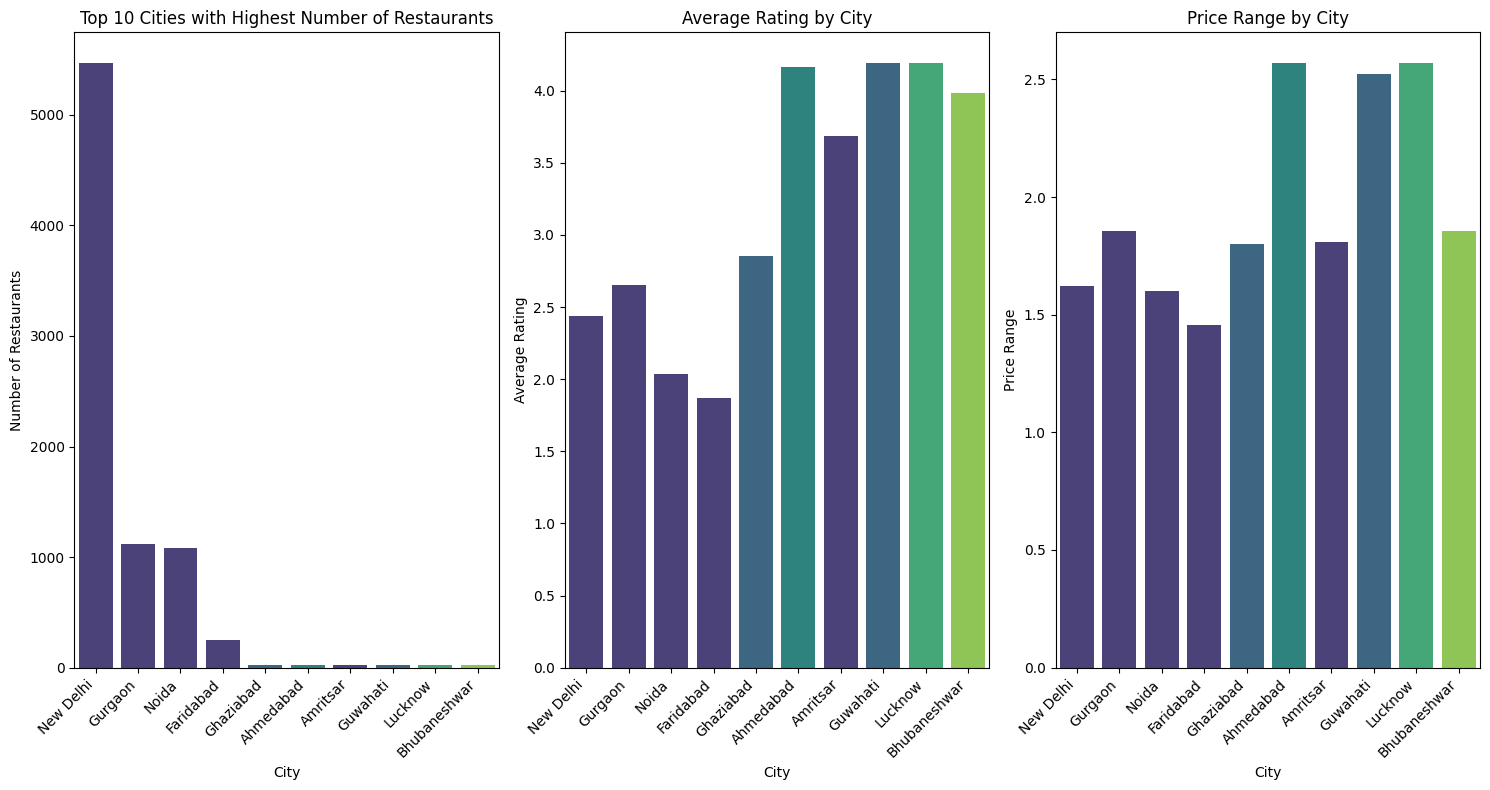

In [7]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.barplot(x="City", y="Restaurant_Count", hue="Most_Common_Cuisine", data=city_stats.head(10), palette="viridis", dodge=False, legend=False)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Cities with Highest Number of Restaurants')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x="City", y="Average_Rating", hue="Most_Common_Cuisine", data=city_stats.head(10), palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Rating by City")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x="City", y="Price_Range", hue="Most_Common_Cuisine", data=city_stats.head(10), palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Price Range")
plt.title("Price Range by City")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Grouping the restaurants by locality and analyzing the concentration of restaurants in different areas and
### calculating statistics such as the average ratings, cuisines, or price ranges by locality.

In [8]:
locality_stats = df_clean.groupby('Locality').agg(
    Restaurant_Count=('Restaurant ID', 'size'),
    Average_Rating=('Aggregate rating', 'mean'),
    Price_Range=('Price range', 'mean'),
    Most_Common_Cuisine=('Cuisines', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

locality_stats = locality_stats.sort_values(by='Restaurant_Count', ascending=False)

In [9]:
locality_stats

,Locality,Restaurant_Count,Average_Rating,Price_Range,Most_Common_Cuisine
216,Connaught Place,122,3.686885,2.598361,"North Indian, Mughlai"
833,Rajouri Garden,99,3.591919,2.202020,"North Indian, Chinese"
969,Shahdara,87,1.413793,1.137931,North Indian
274,Defence Colony,86,3.210465,1.930233,"North Indian, Mughlai"
792,Pitampura,85,2.870588,1.470588,"North Indian, Mughlai"
...,...,...,...,...,...
384,Greenside,1,4.300000,4.000000,"Asian, Sushi, Tapas"
796,Podanur,1,3.800000,2.000000,"Continental, Fast Food, Desserts, Indian"
797,Pondok Aren,1,4.900000,3.000000,"Sunda, Indonesian"
798,"Pont��o Lago Sul, Lago Sul",1,3.200000,4.000000,Seafood


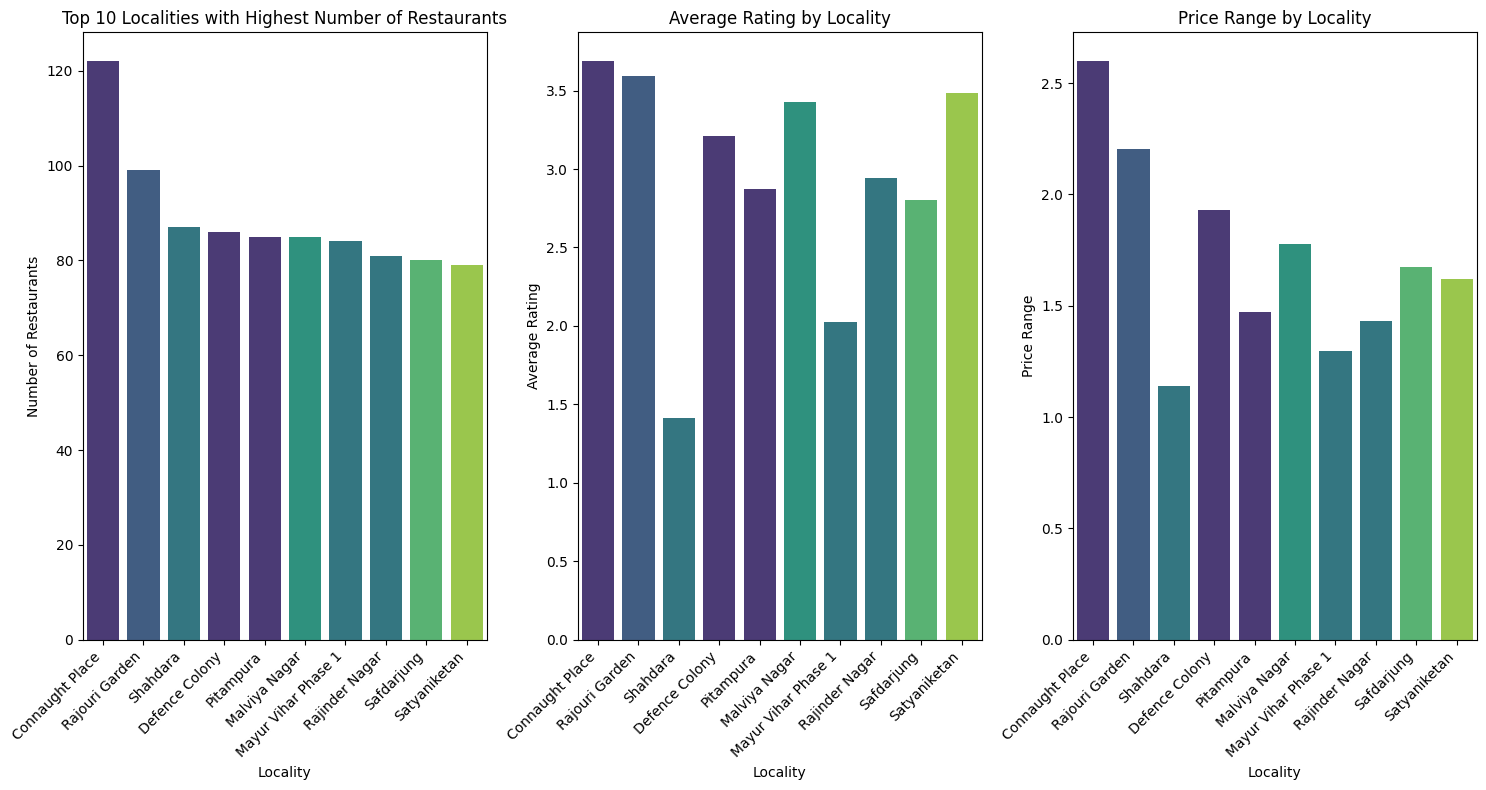

In [10]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.barplot(x="Locality", y="Restaurant_Count", hue="Most_Common_Cuisine", data=locality_stats.head(10), palette="viridis", dodge=False, legend=False)
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Localities with Highest Number of Restaurants')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x="Locality", y="Average_Rating", hue="Most_Common_Cuisine", data=locality_stats.head(10), palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel("Locality")
plt.ylabel("Average Rating")
plt.title("Average Rating by Locality")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x="Locality", y="Price_Range", hue="Most_Common_Cuisine", data=locality_stats.head(10), palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.xlabel("Locality")
plt.ylabel("Price Range")
plt.title("Price Range by Locality")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [11]:
# Splitting the 'Cuisines' column into multiple columns based on ', ' separator, expand=True returns a DataFrame
cuisines_data = df_clean['Cuisines'].str.split(', ', expand=True).stack()

# Resetting the index to flatten the DataFrame and drop the original level 1 index
cuisines_data = cuisines_data.reset_index(level=1, drop=True).to_frame('Cuisine')

# Counting the occurrences of each cuisine
cuisine_counts = cuisines_data['Cuisine'].value_counts().reset_index()

# Renaming the columns for better understanding
cuisine_counts.columns = ['Cuisine', 'Number of Restaurants']

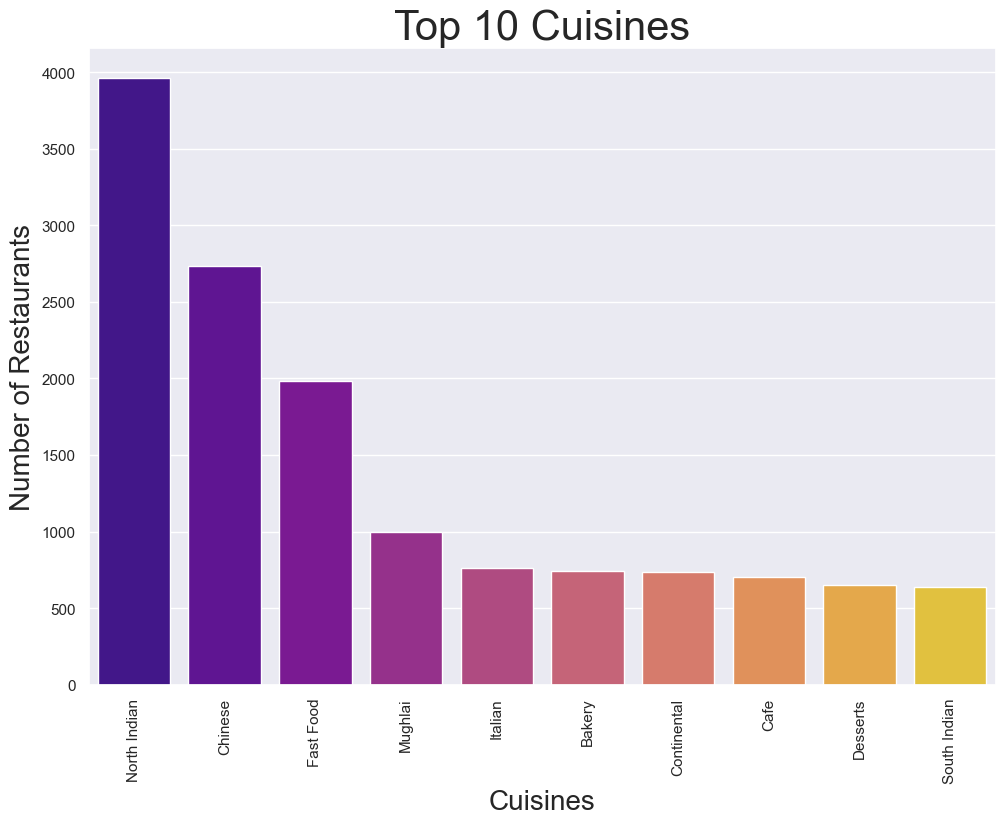

In [12]:
top10_cuisines = cuisine_counts.head(10)

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x='Cuisine', y='Number of Restaurants', data=top10_cuisines, hue='Cuisine', dodge=False, palette='plasma', legend=False)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Restaurants', fontsize=20)
plt.title('Top 10 Cuisines', fontsize=30)
plt.xticks(rotation=90)
plt.show()

# All Insights:-

#### Number of restaurant vs Cuisines:- `Top 10 Cuisines`
#### Number of restaurant vs City/Locality:- `Top 10 Cities/Localities with highest number of restaurants`
#### Average rating vs City/Locality:- `Average rating by city/locality`
#### Price range vs City/Locality:- `Price range by city/locality`